# 交互相关

In [1]:
import numpy as np

# 定义交互相关函数
def cross_correlation(x, h):
    Nx = len(x)
    Nh = len(h)
    y = np.zeros(Nx + Nh - 1)
    for n in range(len(y)):
        for k in range(max(0, n - Nh + 1), min(n + 1, Nx)):
            y[n] += x[k] * h[n - k]
    return y

# 生成数字信号
x = np.array([3, 1, 2, 4, 2])
h = np.array([2, 3, 1])

# 进行交互相关运算
y = cross_correlation(x, h)

print("交互相关计算结果：")
for i, value in enumerate(y):
    print(f"y[{i}] = {value}")

交互相关计算结果：
y[0] = 6.0
y[1] = 11.0
y[2] = 10.0
y[3] = 15.0
y[4] = 18.0
y[5] = 10.0
y[6] = 2.0


# 自相关

In [2]:
import numpy as np

# 定义自相关函数
# 取后半部分
def autocorrelation(x):
    N = len(x)
    R = np.zeros(2 * N - 1)
    for lag in range(2 * N - 1):
        for i in range(N):
            j = i + lag - N + 1
            if j >= 0 and j < N:
                R[lag] += x[i] * x[j]
    return R[N - 1:]  

# 生成数字信号
x = np.array([1, 3, 2, 1, 4])

R = autocorrelation(x)
print("自相关计算结果：")
for i, value in enumerate(R):
    print(f"R[{i}] = {value}")

自相关计算结果：
R[0] = 31.0
R[1] = 15.0
R[2] = 13.0
R[3] = 13.0
R[4] = 4.0


# 自相关应用

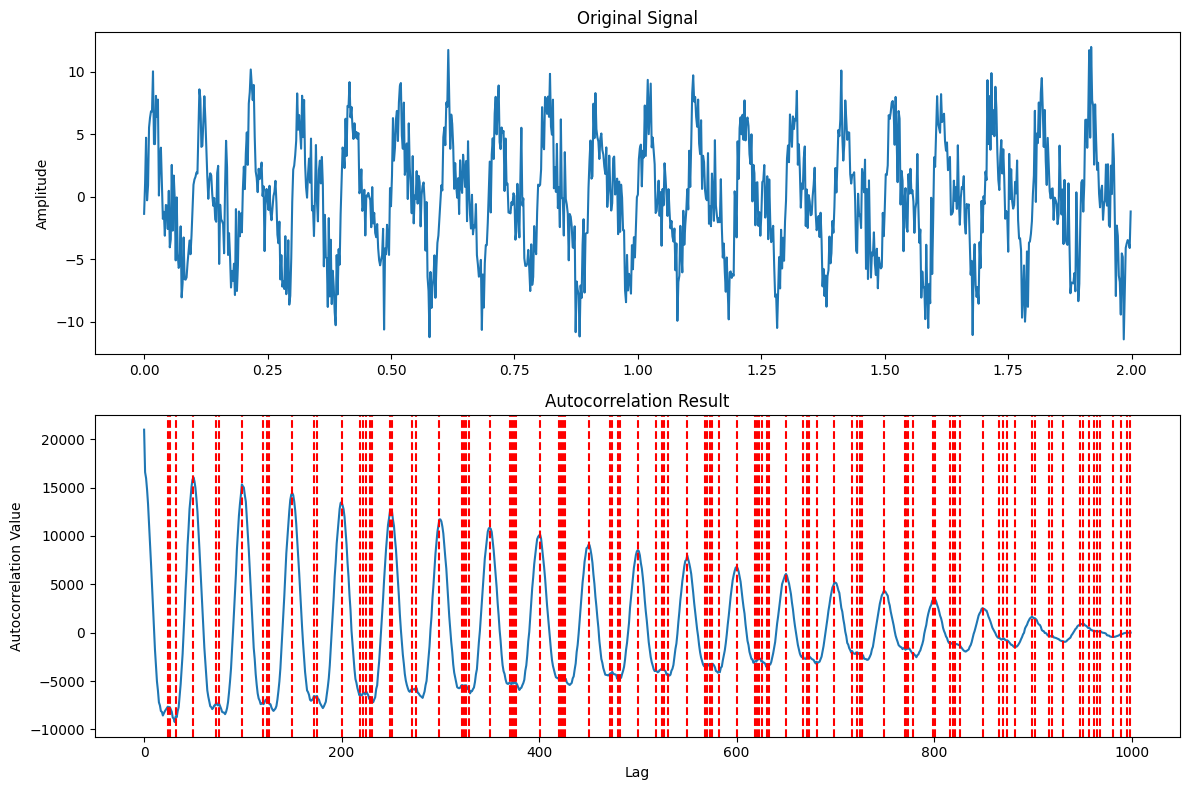

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成复杂信号
t = np.linspace(0, 2, 1000, endpoint=False)
signal = 5 * np.sin(2 * np.pi * 10 * t) + 3 * np.sin(2 * np.pi * 20 * t) + 2 * np.random.randn(len(t))
#自相关函数
def autocorrelation(x):
    N = len(x)
    R = np.zeros(2 * N - 1)
    for lag in range(2 * N - 1):
        for i in range(N):
            j = i + lag - N + 1
            if j >= 0 and j < N:
                R[lag] += x[i] * x[j]
    return R[N - 1:]

autocorr_result = autocorrelation(signal)

# 找到自相关结果中的峰值（表示信号的主要周期）
peaks = []
for i in range(1, len(autocorr_result) - 1):
    if autocorr_result[i] > autocorr_result[i - 1] and autocorr_result[i] > autocorr_result[i + 1]:
        peaks.append(i)

# 可视化原始信号和自相关结果
plt.figure(figsize=(12, 8))

# 原始信号
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')

# 自相关结果
plt.subplot(2, 1, 2)
plt.plot(autocorr_result)
plt.title('Autocorrelation Result')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Value')

# 标记自相关结果中的峰值
for peak in peaks:
    plt.axvline(x=peak, color='r', linestyle='--')
plt.tight_layout()
plt.show()